In [1]:
from datascience import *
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')

# Configure for presentation
np.set_printoptions(threshold=50, linewidth=50)
import matplotlib as mpl
mpl.rc('font', size=16)

## Coin flipping

In [2]:
coin = Table().with_column("Heads", make_array(0, 1))
coin

Heads
0
1


In [20]:
def sample_hist(sample_size):
    coin.sample(sample_size).hist(0, bins=np.arange(1+2))

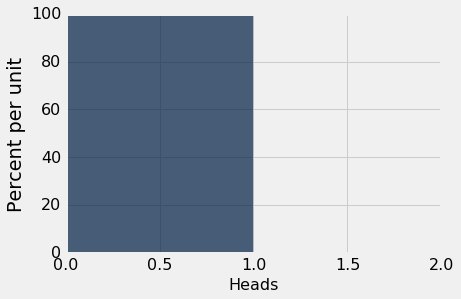

In [21]:
sample_hist(1)

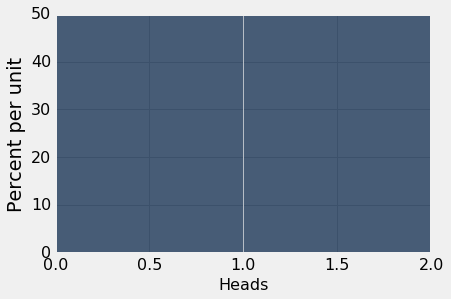

In [37]:
sample_hist(2)

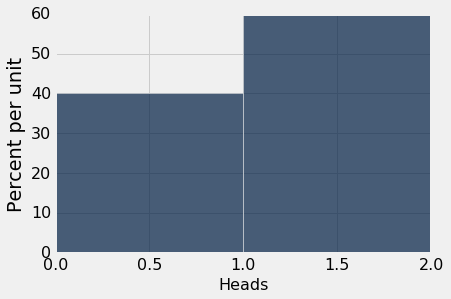

In [39]:
sample_hist(20)

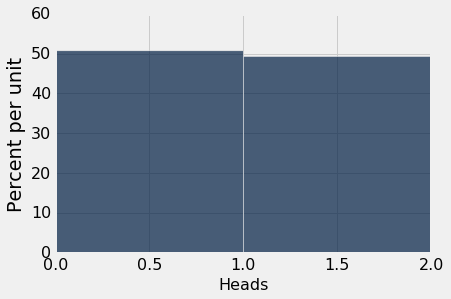

In [44]:
sample_hist(1000)

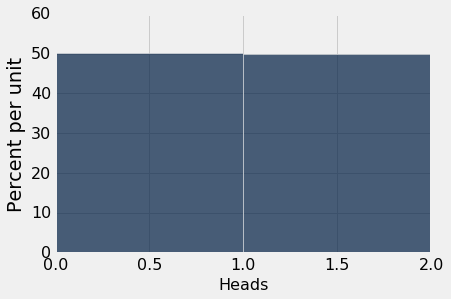

In [49]:
sample_hist(1000000)

In [78]:
# WAY too many samples to try them all.
num_possible_samples = 2**1000000
num_possible_samples

9900656229295898250697923616301903250733624241787567332866396114531709483309486103054614551234648391482431507034583723883510658989416314927422565031572905372314869377232871775494713664238970125842914489614716338412188631103792398056007740136270960553070538667179812336061592179279832732236430322862606574309256916278582042834772001794493190056995140975103125269173943089615493140378429176713780793147953357424131614194925264632270461031051872671543446326415534732828328844476262966391361012119424025100613431716524949459232757177220781095411635556324285623401399844018872126340393003478382714500015263923202290122589106172290370665498223255266570742364678876281944070178196967564313268473039529471786419977305867922878219930648823033450650345967912215239175551092757922030316744363444481760665217392500046261574561285250191078688855985382395910910281904752437827169322142114212392700345639503812353502503119133229035702263721456724737028852183729673865439926655978577772441147113534229818712960636023

## Many experiments

In [72]:
def proportion_in_one_experiment(sample_size):
    return np.mean(coin.sample(sample_size).column("Heads"))

def proportions_in_many_experiments(sample_size, num_experiments):
    sizes = Table().with_columns("Sample size", np.repeat(sample_size, num_experiments))
    experiments = sizes.with_columns("Proportion heads", sizes.apply(proportion_in_one_experiment, "Sample size"))
    return experiments

def proportions_hist(sample_size, num_experiments):
    experiments = proportions_in_many_experiments(sample_size, num_experiments)
    bin_width = min(.1, max(.005, 4 / sample_size))
    experiments.hist("Proportion heads", bins=np.arange(0, 1+2*bin_width, bin_width))

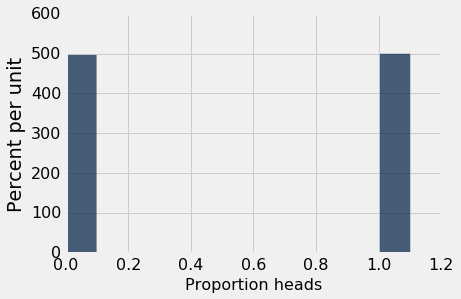

In [76]:
proportions_hist(1, 10000)

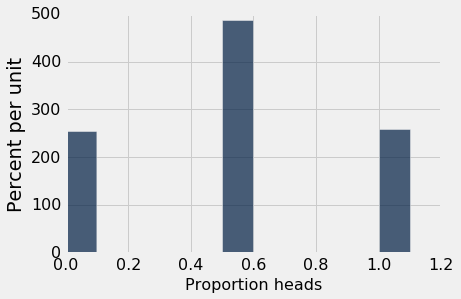

In [83]:
proportions_hist(2, 10000)

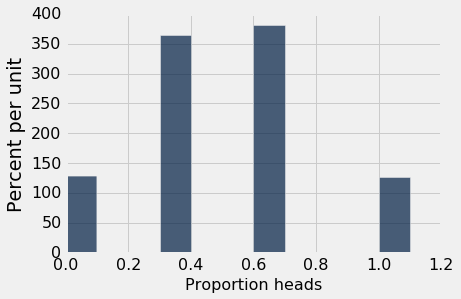

In [84]:
proportions_hist(3, 10000)

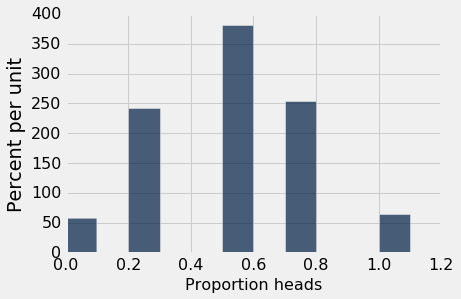

In [85]:
proportions_hist(4, 10000)

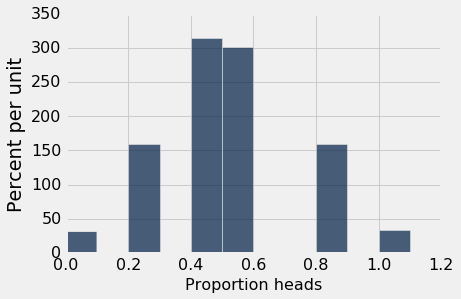

In [86]:
proportions_hist(5, 10000)

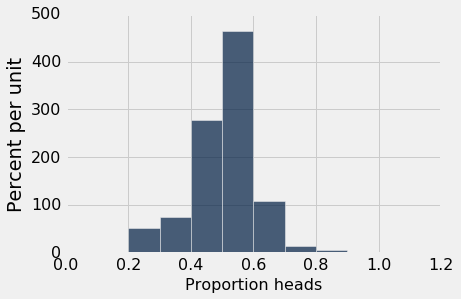

In [74]:
proportions_hist(20, 10000)

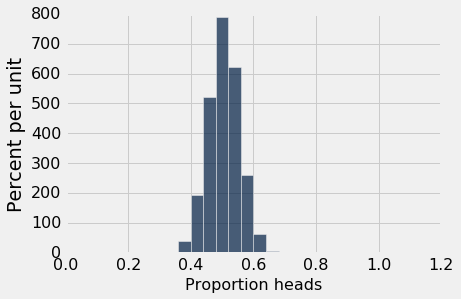

In [73]:
proportions_hist(100, 10000)

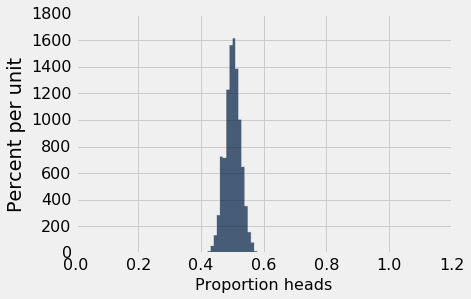

In [75]:
proportions_hist(400, 10000)

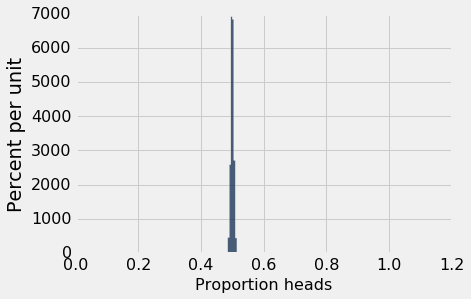

In [71]:
proportions_hist(10000, 10000)

## Mendelian genetics

In [96]:
flowers = Table().with_columns("Color", make_array("Pink", "Pink", "Pink", "White"))

def proportion_in_one_experiment(sample_size):
    return flowers.sample(sample_size).where("Color", are.equal_to("Pink")).num_rows / sample_size

def proportions_in_many_experiments(sample_size, num_experiments):
    sizes = Table().with_columns("Sample size", np.repeat(sample_size, num_experiments))
    experiments = sizes.with_columns("Proportion pink", sizes.apply(proportion_in_one_experiment, "Sample size"))
    return experiments

def proportions_hist(sample_size, num_experiments):
    experiments = proportions_in_many_experiments(sample_size, num_experiments)
    bin_width = min(.1, max(.005, 4 / sample_size))
    experiments.hist("Proportion pink", bins=np.arange(0, 1+2*bin_width, bin_width))

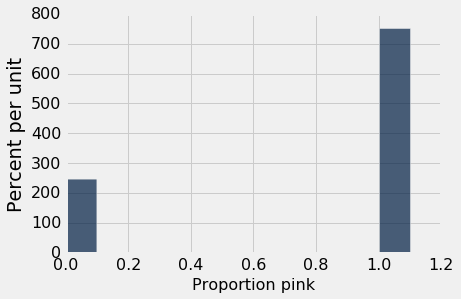

In [97]:
proportions_hist(1, 10000)

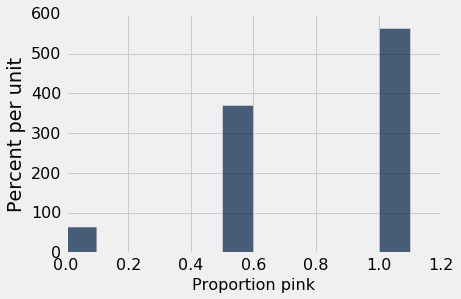

In [98]:
proportions_hist(2, 10000)

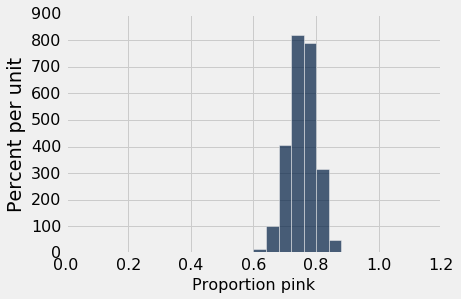

In [99]:
proportions_hist(100, 10000)

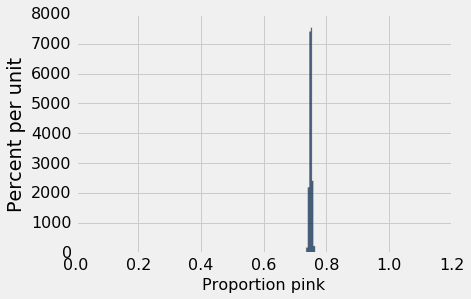

In [100]:
proportions_hist(10000, 10000)

## Jury selection

In [80]:
population = 16000
proportion_black = .26
num_black = int(population*proportion_black)
num_nonblack = population - num_black
# A table with 16000 rows, representing the population that was
# eligible for juries.
eligible = Table().with_columns(
    "Race", np.append(np.repeat("black", num_black), np.repeat("non-black", num_nonblack)))

# The test statistic:
def num_black(pool):
    """Given a table with a 'Race' column, returns the number of rows labeled 'black'."""
    return pool.where("Race", are.equal_to("black")).num_rows

# A function to simulate once under the null hypothesis:
def simulate_under_null(sample_size):
    return eligible.sample(sample_size, with_replacement=False)

# A function to simulate a jury pool once under the null hypothesis and then
# return the test statistic for that simulated jury pool.
def count_black_in_sample(sample_size):
    return num_black(simulate_under_null(sample_size))

# A function to run many simulations under the null hypothesis
# and return a table of the computed test statistics for each
# simulation:
def simulate_jury_pools(sample_size, num_simulations):
    sample_sizes = Table().with_columns(
        "Simulation #", np.arange(num_simulations),
        "Sample size", np.repeat(sample_size, num_simulations))
    samples = sample_sizes.with_columns(
        "Number black in sample",
        sample_sizes.apply(count_black_in_sample, "Sample size"))
    return samples

def simulate_and_draw_histogram(sample_size, num_simulations):
    simulate_jury_pools(sample_size, num_simulations).hist("Number black in sample", bins=np.arange(sample_size+1))

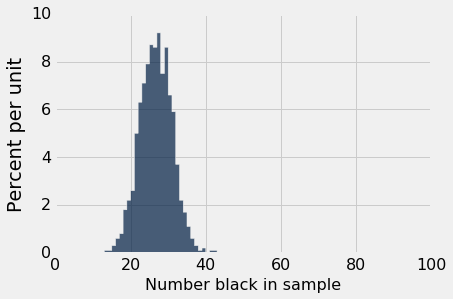

In [81]:
simulate_and_draw_histogram(100, 1000)

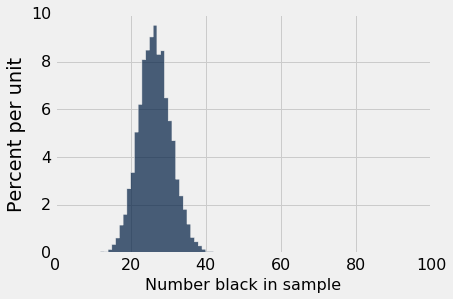

In [16]:
simulate_and_draw_histogram(100, 10000)

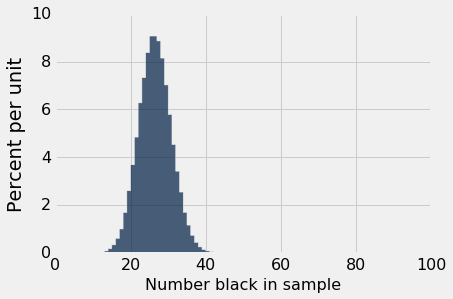

In [17]:
# Takes awhile to run!
simulate_and_draw_histogram(100, 100000)

In [52]:
# The actual number of samples:
import math
int(math.factorial(16000) / (math.factorial(16000-100)*math.factorial(100)))

20293425875484627786228822782713690479365125566150070500337534960168803942769172144412137756274107315577474552556260435283507404996929154915289079505724966796234442932398486147493984606256522000807656502541874864628633865023429937520850860694976120842276975935488

In [ ]:
# What if the jury were larger?

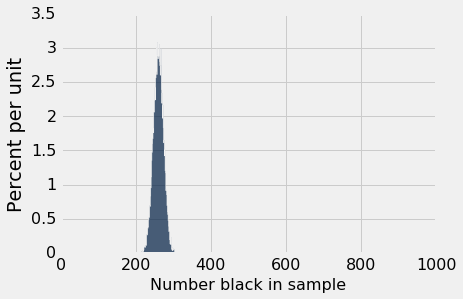

In [82]:
simulate_and_draw_histogram(1000, 10000)